In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from astropy.table import Table

In [7]:
model_data = Table.read('../cepheid_data/delta_cep.fits', format='fits', hdu=1);
lc = pickle.load(open('../cepheid_data/cepheid_lc.pkl', 'rb'))

In [9]:
from collections import defaultdict

obs_phases = defaultdict(list)
obs_magnitudes = defaultdict(list)
obs_magnitudes_err = defaultdict(list)
obs_colors = defaultdict(list)
obs_colors_err = defaultdict(list)

for r in model_data:
    if 'mag' in r['OBS']:
        filter = r['OBS'].split('|')[1]
        obs_phases[filter].append(r['PHASE'])
        obs_magnitudes[filter].append(r['MEAS'])
        obs_magnitudes_err[filter].append(r['ERR'])
    if 'color' in r['OBS']:
        filter = r['OBS'].split('|')[1]
        obs_phases[filter].append(r['PHASE'])
        obs_colors[filter].append(r['MEAS'])
        obs_colors_err[filter].append(r['ERR'])

In [32]:
model_data["PERIOD"][0]

5.366265401100268

In [33]:
vws = lc['wavelengths']
spectra_broad = np.array(lc['spectra_broad'])
spectra_broad = np.array(spectra_broad)

timeseries = np.linspace(0.0, model_data["PERIOD"][0], 100)

In [35]:
phases = (timeseries / model_data["PERIOD"][0]) % 1

In [54]:
from spice.spectrum.filter import Bolometric, JohnsonCousinsV, JohnsonCousinsR, GaiaG, TychoBT, TychoVT
from spice.spectrum.spectrum import AB_passband_luminosity
# b = Bolometric()
# bolometric_lum = [AB_passband_luminosity(b, vws, s[:, 0]) for s in spectra_broad]
johnson_v = JohnsonCousinsV()
johnson_r = JohnsonCousinsR()
gaia_g = GaiaG()
tycho_bt = TychoBT()
tycho_vt = TychoVT()
v_lum = np.array([AB_passband_luminosity(johnson_v, vws, s[:, 0]) for s in spectra_broad])
r_lum = np.array([AB_passband_luminosity(johnson_r, vws, s[:, 0]) for s in spectra_broad])
g_lum = np.array([AB_passband_luminosity(gaia_g, vws, s[:, 0]) for s in spectra_broad])
bt_lum = np.array([AB_passband_luminosity(tycho_bt, vws, s[:, 0]) for s in spectra_broad])
vt_lum = np.array([AB_passband_luminosity(tycho_vt, vws, s[:, 0]) for s in spectra_broad])

In [37]:
obs_phases.keys()

dict_keys(['V_GCPD_Johnson', 'B_GCPD_Johnson-V_GCPD_Johnson', 'K_CTIO_ANDICAM', 'H_CTIO_ANDICAM', 'J_CTIO_ANDICAM', 'B_MvB_TYCHO', 'V_MvB_TYCHO', 'Hp_MvB_Hipparcos', 'I1_Spitzer_IRAC', 'I2_Spitzer_IRAC', '12mu_IRAS', '25mu_IRAS', 'A_MSX', 'C_MSX', 'D_MSX', 'E_MSX', 'W3_WISE', 'W4_WISE', '24mu_Spitzer_MIPS', 'V'])

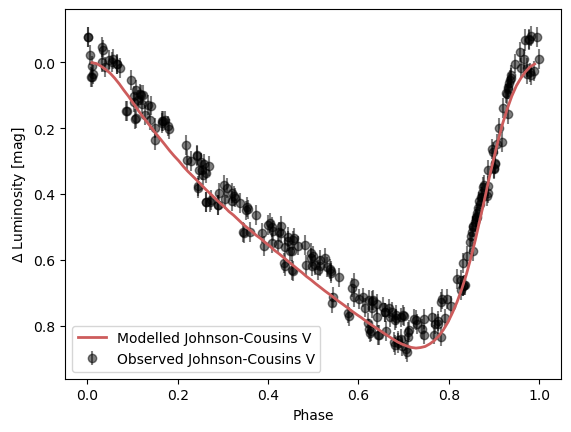

In [57]:
fig = plt.figure()
plt.errorbar(obs_phases['V_GCPD_Johnson'], obs_magnitudes['V_GCPD_Johnson']-obs_magnitudes['V_GCPD_Johnson'][0], yerr=obs_magnitudes_err['V_GCPD_Johnson'], color='black',
             marker='o', linestyle='None', alpha=0.5, label='Observed Johnson-Cousins V', zorder=1);
plt.plot(phases[1:-1], v_lum[1:-1]-v_lum[0], color='indianred', alpha=1, linewidth=2,
         label='Modelled Johnson-Cousins V', zorder=2);   
plt.gca().invert_yaxis()
plt.xlabel('Phase')
plt.ylabel(r'$\Delta$ Luminosity [mag]')
plt.legend()
plt.show()

In [59]:
fig.savefig('delta_cephei_johnson_v.png', dpi=300, bbox_inches='tight')